In [1]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
with h5py.File("Data/Mid_Level_Linear_Dataset_Data_For_Correlation.h5", "r") as hf:
    preds = hf["train"][:]  # (N, 7)
    labels = hf["label"][:] # (N, 9)

In [3]:
labels.dtype

dtype('float32')

In [4]:
preds.dtype

dtype('float32')

In [5]:
features = ["Melodiousness","Articulation","Rhythmic Complexity","Rhythmic Stability",
            "Dissonance","Tonal Stability","Modality"]
emotions = ["Amazement","Solemnity","Tenderness","Nostalgia","Calmness",
            "Power","Joy","Tension","Sadness"]

In [6]:
df_preds = pd.DataFrame(preds, columns=features)
df_labels = pd.DataFrame(labels, columns=emotions)

In [23]:
# Correlation matrix (7x9)
correlation_matrix = pd.DataFrame(index=features, columns=emotions)

for feat in features:
    for emo in emotions:
        corr, _ = pearsonr(df_preds[feat], df_labels[emo])
        correlation_matrix.at[feat, emo] = corr

correlation_matrix = correlation_matrix.astype(float)

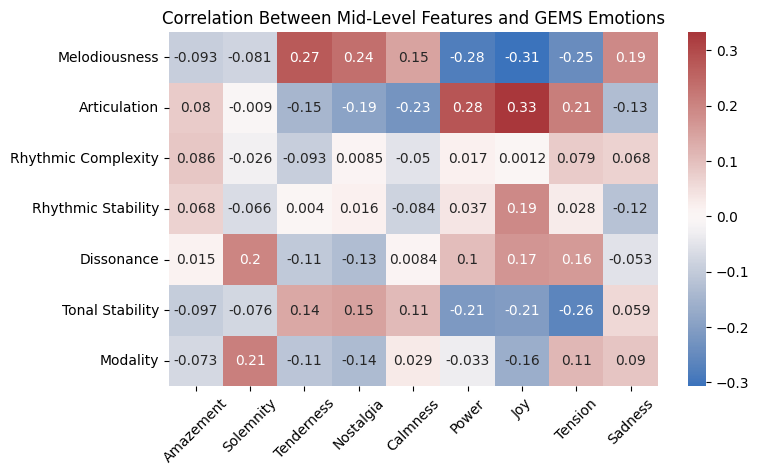

In [25]:
# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="vlag", center=0)
plt.title("Correlation Between Mid-Level Features and GEMS Emotions")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()